In [51]:
# Import modules for data wrangling
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from datetime import datetime

In [2]:
# Read in .csv data to be cleaned
# Change global setting so that all columns will be displayed in dataframes and analyses
data = pd.read_csv('..\data\external\TTS_LBNL_public_file_07-Sep-2022_all.csv')
pd.set_option('display.max_columns', None)
data.head()

C:\Users\Zachary Brown\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,2,3,14,15,17,19,27,28,30,31,33,34,37,38,39,52,53,55,56,58,59,73,74,75) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,GBI-JH4-00002,-1,26-Sep-2003,26.4,224000.00,241308.00,COM,0,0,-1,0,-1,2540,Falmouth,MA,NSTAR DBA EverSource,-1,Northern Pacific Power,0,170.0,-1.0,-1.0,8.0,-1,-1,-1,-1,88,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,SMA America,SWR 2500U,11.0,-1,-1,-1,-1,-1,-1,0,0,-1,-1,1,-1,-1,2.5,-1.0,-1.0,0,0.96,-1,-1,-1,-1.0,-1.0
1,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,CPV-LG8-00003,-1,17-Apr-2003,2.2,16621.00,9256.50,RES,0,0,-1,0,-1,2132,Boston,MA,NSTAR DBA EverSource,-1,Zapotec Energy,0,225.0,-1.0,-1.0,20.0,-1,-1,-1,-1,22,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,SMA America,SWR 2500U,1.0,-1,-1,-1,-1,-1,-1,0,0,-1,-1,1,-1,-1,2.5,-1.0,-1.0,0,0.88,-1,-1,-1,-1.0,-1.0
2,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,CPV-LG8-00004,-1,05-May-2003,2.2,16621.00,9256.50,RES,0,0,-1,0,-1,2458,Newton,MA,NSTAR DBA EverSource,-1,Zapotec Energy,0,180.0,-1.0,-1.0,20.0,-1,-1,-1,-1,22,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,SMA America,SWR 2500U,1.0,-1,-1,-1,-1,-1,-1,0,0,-1,-1,1,-1,-1,2.5,-1.0,-1.0,0,0.88,-1,-1,-1,-1.0,-1.0
3,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,CPV-LG8-00005,-1,25-Jun-2003,2.2,16621.00,9256.50,RES,0,0,-1,0,-1,2459,Newton,MA,NSTAR DBA EverSource,-1,Zapotec Energy,0,165.0,-1.0,-1.0,30.0,-1,-1,-1,-1,22,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,SMA America,SWR 2500U,1.0,-1,-1,-1,-1,-1,-1,0,0,-1,-1,1,-1,-1,2.5,-1.0,-1.0,0,0.88,-1,-1,-1,-1.0,-1.0
4,Massachusetts Clean Energy Center,Massachusetts Department of Energy Resources,CPV-LG8-00006,-1,05-May-2003,2.1,16006.95,8835.75,RES,0,1,-1,0,-1,2464,Newton,MA,NSTAR DBA EverSource,-1,Zapotec Energy,0,178.0,-1.0,-1.0,25.0,-1,-1,-1,-1,21,-1,-1,-1,-1,-1,-1,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,SMA America,SWR 2500U,1.0,-1,-1,-1,-1,-1,-1,0,0,-1,-1,1,-1,-1,2.5,-1.0,-1.0,0,0.84,-1,-1,-1,-1.0,-1.0


In [3]:
data.shape

(2362537, 78)

In [4]:
data.columns

Index(['data_provider_1', 'data_provider_2', 'system_ID_1', 'system_ID_2',
       'installation_date', 'system_size_DC', 'total_installed_price',
       'rebate_or_grant', 'customer_segment', 'expansion_system',
       'multiple_phase_system', 'new_construction', 'tracking',
       'ground_mounted', 'zip_code', 'city', 'state',
       'utility_service_territory', 'third_party_owned', 'installer_name',
       'self_installed', 'azimuth_1', 'azimuth_2', 'azimuth_3', 'tilt_1',
       'tilt_2', 'tilt_3', 'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'technology_module_3', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capaci

In [5]:
data.dtypes

data_provider_1                object
data_provider_2                object
system_ID_1                    object
system_ID_2                    object
installation_date              object
                               ...   
dateOfBatteryInstall           object
battery_manufacturer           object
battery_model                  object
battery_rated_capacity_kW     float64
battery_rated_capacity_kWh    float64
Length: 78, dtype: object

In [6]:
# I only want to analyze residential installations, so I need to check what the values in 'customer_segment' are that represent
# residential vs commercial
print(data['customer_segment'].unique())

['COM' 'RES' 'SCHOOL' 'GOV' 'NON-PROFIT' '-1' 'NON-RES']


In [7]:
# Now I'll subset the data to just residential installations
res_data = data[data['customer_segment'] == 'RES']
res_data.shape

(2262667, 78)

In [8]:
# I'm only interested in the most recent year of data - 2021 - so I'll first check to make sure that there are enough 
# installations to still create a valid model if I pare the data down to only 2021
newest_year = res_data['installation_date'].str[7:11] == '2021'
res_data[newest_year].shape

(276683, 78)

In [9]:
# Great! I still have >200,000 installations to analyze which should be plenty.
# Let's now change the 'installation_date' column to datetime
newest_res_data = res_data[newest_year].copy()
newest_res_data.head()

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh
291412,Arizona Public Service,-1,117914,-1,04-Jan-2021,8.450,38648.65,-1.0,RES,0,0,-1,-1,-1,86323,Chino Valley,AZ,Arizona Public Service,0,Titan Solar,0,-1.0,-1.0,-1.0,-1.0,-1,-1,Hanwha Q CELLS,B.LINE PLUS L-G4.2 325,-1,-1,-1,-1,-1,-1,-1,-1,Polycrystalline,-1,-1,0,-1,-1,0,-1,-1,325.0,-1.0,-1.0,0.162989,-1.0,-1.0,SolarEdge Technologies Ltd.,SE7600H-US [240V],-1.0,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,1,-1,-1,7.616,-1.0,-1.0,1,-1.0,-1,-1,-1,-1.0,-1.0
291413,Arizona Public Service,-1,117915,-1,04-Jan-2021,14.950,99810.72,-1.0,RES,0,0,-1,-1,-1,85308,Glendale,AZ,Arizona Public Service,1,Sunrun Inc.,0,-1.0,-1.0,-1.0,-1.0,-1,-1,"Jinko Solar Co., Ltd",JKM325M-60HBL-Q,-1,-1,-1,-1,-1,-1,-1,-1,Monocrystalline,-1,-1,0,-1,-1,0,-1,-1,325.0,-1.0,-1.0,0.199387,-1.0,-1.0,Enphase Energy Inc.,IQ7-60-2-US [240V],-1.0,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,0,-1,-1,0.240,-1.0,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0
291414,Arizona Public Service,-1,117916,-1,04-Jan-2021,21.775,51909.00,-1.0,RES,0,0,-1,-1,-1,85024,Phoenix,AZ,Arizona Public Service,0,Aneva Solar LLC,0,-1.0,-1.0,-1.0,-1.0,-1,-1,LG Electronics Inc.,LG325N1K-V5,-1,-1,-1,-1,-1,-1,-1,-1,Monocrystalline,-1,-1,0,-1,-1,0,-1,-1,325.0,-1.0,-1.0,0.197125,-1.0,-1.0,Enphase Energy Inc.,IQ7-60-2-US [240V],-1.0,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,0,-1,-1,0.240,-1.0,-1.0,0,-1.0,-1,-1,-1,-1.0,-1.0
291415,Arizona Public Service,-1,117917,-1,04-Jan-2021,8.520,25866.00,-1.0,RES,0,0,-1,-1,-1,85009,Phoenix,AZ,Arizona Public Service,0,Titan Solar,0,-1.0,-1.0,-1.0,-1.0,-1,-1,REC Solar,REC355AA BLACK,-1,-1,-1,-1,-1,-1,-1,-1,Monocrystalline,-1,-1,0,-1,-1,0,-1,-1,355.0,-1.0,-1.0,0.210059,-1.0,-1.0,SolarEdge Technologies Ltd.,SE7600H-US [240V],-1.0,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,1,-1,-1,7.616,-1.0,-1.0,1,-1.0,-1,-1,-1,-1.0,-1.0
291416,Arizona Public Service,-1,117918,-1,04-Jan-2021,5.510,15335.28,-1.0,RES,0,0,-1,-1,-1,85351,Sun City,AZ,Arizona Public Service,1,Titan Solar,0,-1.0,-1.0,-1.0,-1.0,-1,-1,REC Solar,REC290PE Z-Link-M,-1,-1,-1,-1,-1,-1,-1,-1,Monocrystalline,-1,-1,0,-1,-1,0,-1,-1,290.0,-1.0,-1.0,0.176108,-1.0,-1.0,SolarEdge Technologies Ltd.,SE5000H-US [240V],-1.0,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,1,-1,-1,5.052,-1.0,-1.0,1,-1.0,-1,-1,-1,-1.0,-1.0


In [12]:
# Now I'll convert the 'installation_date' column to datetime
newest_res_data['installation_date'] = pd.to_datetime(newest_res_data['installation_date'])

In [13]:
newest_res_data.dtypes

data_provider_1                       object
data_provider_2                       object
system_ID_1                           object
system_ID_2                           object
installation_date             datetime64[ns]
                                   ...      
dateOfBatteryInstall                  object
battery_manufacturer                  object
battery_model                         object
battery_rated_capacity_kW            float64
battery_rated_capacity_kWh           float64
Length: 78, dtype: object

In [14]:
# Rather than have the model attempt to process each day of the year, it makes more sense to break the date into bins by 
# month
newest_res_data['installation_month'] = newest_res_data['installation_date'].dt.month
newest_res_data['installation_month'].value_counts()

7     26983
12    25174
8     24470
3     24287
11    23935
6     23588
9     22818
10    22507
4     22197
1     21007
5     19941
2     19776
Name: installation_month, dtype: int64

In [15]:
# Now I'll confirm that the monetary columns are correctly detected as floats
newest_res_data[['total_installed_price', 'rebate_or_grant']].dtypes

total_installed_price    float64
rebate_or_grant          float64
dtype: object

In [16]:
# To perform some preliminary checks I'll take a look at the .describe() results for the pared down dataset
newest_res_data.describe(include='all', datetime_is_numeric=True)

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,dateOfBatteryInstall,battery_manufacturer,battery_model,battery_rated_capacity_kW,battery_rated_capacity_kWh,installation_month
count,276683,276683,276683.0,276683,276683,276683.000000,2.766830e+05,276683.000000,276683,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.0,276683.0,276683,276683,276683.000000,276683,276683.000000,276683.000000,276683.000000,276683.00000,276683.000000,276683.000000,276683.000000,276683,276683.0,276683.000000,276683,276683,276683.000000,276683,276683,276683.000000,276683.000000,276683,276683,276683,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683,276683,276683.000000,276683,276683,276683.000000,276683,276683,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683.000000,276683,276672,276672,276683.000000,276683.000000,276683.000000
unique,25,6,262337.0,8877,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,10391.0,5770.0,21,175,NaN,2866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122,2332.0,NaN,81,618,NaN,50,332,NaN,NaN,8,8,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,419,NaN,39,179,NaN,24,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,473,25,48,NaN,NaN,NaN
top,California Public Utilities Commission,-1,-1.0,-1,NaN,NaN,NaN,NaN,RES,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,CA,Pacific Gas and Electric,NaN,Sunrun Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hanwha Q CELLS,-1.0,NaN,-1,-1,NaN,-1,-1,NaN,NaN,Monocrystalline,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SolarEdge Technologies Ltd.,IQ7PLUS-72-2-US [240V],NaN,-1,-1,NaN,-1,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1,NaN,NaN,NaN
freq,175392,171727,12005.0,168409,NaN,NaN,NaN,NaN,276683,NaN,NaN,NaN,NaN,NaN,11535.0,17275.0,175392,84873,NaN,39367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53077,26131.0,NaN,186234,186234,NaN,185399,185399,NaN,NaN,221252,186234,185399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88933,32695,NaN,197933,198527,NaN,198232,198292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209495,203150,210645,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2021-07-06 01:59:44.724757248,8.397670,2.723398e+04,240.530170,NaN,0.061984,0.003394,-0.970797,-0.292486,-0.315545,NaN,NaN,NaN,NaN,0.197471,NaN,-0.057138,129.862384,4.232432,1.06266,13.610124,-0.177138,-0.673702,NaN,NaN,15.149695,NaN,NaN,-0.560696,NaN,NaN,-0.892006,-0.274339,NaN,NaN,NaN,-0.183123,-0.966351,-0.987914,-0.178417,-0.966539,-0.987943,282.474129,10.192675,3.063861,-0.035304,-0.960958,-0.985863,NaN,NaN,7.534587,NaN,NaN,-0.958910,NaN,NaN,-0.996874,-0.278904

So there are some obvious issues presented from these descriptive statistics:
    'total_installed_price' and 'rebate_or_grant' both show -1 as their lowest value, which is obviously incorrect
    There are 473 unique values for 'date_of_battery_install' which should max out at 365, so something is off there
    

In [17]:
# I will need to calculate the final price by subtracting 'rebate_or_grant' from 'total_installed_price', so any rows with no
# data for 'total_installed_price' should be removed
print(newest_res_data['total_installed_price'].isna().sum())

0


In [45]:
print(np.sort(newest_res_data['total_installed_price'].unique()))

[-1.000000e+00  1.000000e-02  1.000000e-01 ...  1.382300e+07  1.541000e+07
  1.721412e+07]


<function matplotlib.pyplot.show(close=None, block=None)>

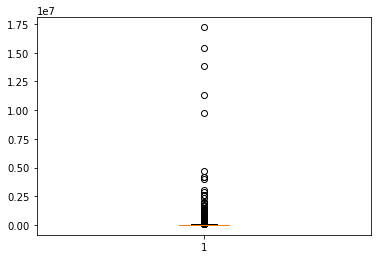

In [18]:
# Now I'll plot a box plogt of 'total_installed_price' to look for outliers and to determine if there is 
# a threshold below which we can safely say the values are erroneous or placeholders
plt.boxplot(newest_res_data['total_installed_price'])
plt.show

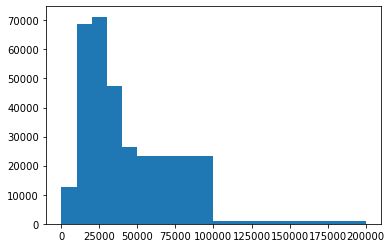

In [29]:
# There are a lot of potential outliers shown in this box plot, so let's take a look at a log-scaled histogram
plt.hist(newest_res_data['total_installed_price'], bins=[-1,100,10000,20000,30000,40000,50000,100000,200000])
plt.show()

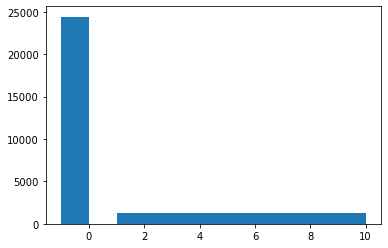

In [50]:
# The histogram above is concerning because it looks like there's more than 10,000 entries below $1,000 which is likely lower
# than a real solar panel installation. Let's dig a little deeper, as -1 values are likely entered in place of missing data
plt.hist(newest_res_data['total_installed_price'], bins=[-1, 0, 1, 10])
plt.show()

In [55]:
# Ok, so it turns out there were almost 25,000 entries of -1 that we didn't even see in the previous histogram. 
# Now I want to know if there are any obvious correlations that might explain the high number of missing entries
# First I'll make a new dataframe with just rows that have -1 for 'total_installed_price'
neg_price = newest_res_data[newest_res_data['total_installed_price'] == -1]
# Now I'll check data provider to see if there's a specific culprit who is missing installation price
print(neg_price['data_provider_1'].value_counts())

New Jersey Board of Public Utilities                            12674
Arizona Public Service                                           7959
Illinois Power Agency                                            1866
Central Maine Power                                               801
Washington, D.C. Public Service Commission                        643
California Public Utilities Commission                            252
Xcel Energy                                                        71
New York State Energy Research and Development Authority           48
Salt River Project                                                 47
Ohio Public Utilities Commission                                   33
New Mexico Energy, Minerals and Natural Resources Department       11
Gainesville Regional Utilities                                     10
Tucson Electric Power                                               7
CPS Energy                                                          4
Orlando Utilities Co

In [59]:
# There are definitely a few primary providers that are missing a lot of installation price information.
# I want to see how this is divided by state next and identify if this is going to have a major impact on the number of results
# we have from any specific states
print(neg_price['state'].value_counts()/newest_res_data['state'].value_counts() * 100)

AZ     28.736910
CA      0.143678
CO      0.628994
CT           NaN
DC    100.000000
DE           NaN
FL      0.506679
IL    100.000000
MA      0.011952
MD      0.030665
ME    100.000000
MN      0.643604
NH           NaN
NJ    100.000000
NM      0.423240
NY      0.444774
OH    100.000000
RI           NaN
TX      0.064506
UT      0.023474
WI           NaN
Name: state, dtype: float64


Uh oh, Ohio, Illinois, New Jersey, Maine, and Washington DC have only -1 values for 'total_installed_price'! Arizona also has ~29% of its values as -1. If these values are removed then the model will only apply to the remaining states. Fortunately, the goal of this project is to model price in Texas, which only has 0.06% -1 values.

In [ ]:
# I can go ahead and create the final price column that will be my metric for the model
newest_res_data['final_price'] = newest_res_data['total_installed_price'] - newest_res_data['rebate_or_grant']

In [ ]:
# res_data.profile_report()